In [1]:
from proveit import specialStatementMagic # for %begin_theorems and %end_theorems
from proveit.basiclogic import Forall, Equals
from proveit.number import Summation, DiscreteContiguousSet, Abs, Neg, Add, Subtract, Multiply, Fraction, Exponentiate
from proveit.number import GreaterThan, LessThanEquals, DiscreteContiguousSet, Ceil, Floor, Mod
from proveit.statistics import Prob
from proveit.common import l, t, eps, k
from proveit.number.common import zero, one, two, four, e, pi, i
from proveit.linalg import MatrixProd
from proveit.physics.quantum import Bra, Ket
from proveit.physics.quantum.QPE.common import phase_, m_, b_, delta_, two_pow_t, two_pow_t_minus_one, alpha_l, alpha_l_sqrd
from proveit.physics.quantum.QPE.phaseEstOps import Psuccess, Pfail, ModAdd
from IPython.display import display

Some theorem sub-expressions before we define the theorems:

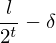

In [2]:
two_pow_t_delta__minus__l = Subtract(Multiply(two_pow_t, delta_), l)
l_over_two_pow_t__minus__delta = Subtract(Fraction(l, two_pow_t), delta_)
display(two_pow_t_delta__minus__l)
display(l_over_two_pow_t__minus__delta)

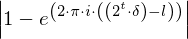

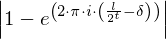

In [3]:
alpha_l_summed_numer = Abs(Subtract(one, Exponentiate(e, Multiply(two, pi, i, 
                                                                two_pow_t_delta__minus__l))))
alpha_l_summed_denom = Abs(Subtract(one, Exponentiate(e, Multiply(two, pi, i, 
                                                                  l_over_two_pow_t__minus__delta))))
display(alpha_l_summed_numer)
display(alpha_l_summed_denom)           

In [4]:
%begin_theorems

Success probability as sum of individual success event probabilities:

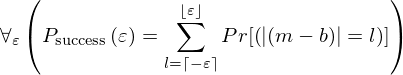

In [5]:
success_sum = Forall(eps, Equals(Psuccess(eps), Summation(l, Prob(Equals(Abs(Subtract(m_, b_)), l)), DiscreteContiguousSet(Ceil(Neg(eps)), Floor(eps)))))
success_sum

Failure probability as sum of individual failure event probabilities in terms of $\alpha_l$, amplitude of $\lvert \Psi \rangle$ for a state specified relative to $b$ (the best outcome state):

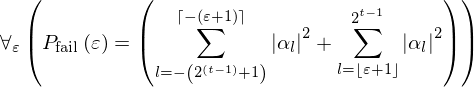

In [6]:
fail_sum = Forall(eps, Equals(Pfail(eps), Add(Summation(l, alpha_l_sqrd, 
                                                        DiscreteContiguousSet(Neg(Add(two_pow_t_minus_one, one)), 
                                                                              Ceil(Neg(Add(eps, one))))),
                                              Summation(l, alpha_l_sqrd, 
                                                        DiscreteContiguousSet(Floor(Add(eps, one)), 
                                                                              two_pow_t_minus_one)))))
fail_sum

Direct evaluation of $\alpha_l$:

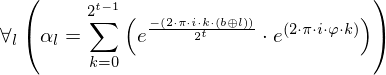

In [8]:
alpha_l_eval = Forall(l, Equals(alpha_l, 
                                Summation(k, Multiply(Exponentiate(e, Fraction(Neg(Multiply(two, pi, i, k, 
                                                                                            ModAdd(b_, l))),
                                                                               two_pow_t)), 
                                                      Exponentiate(e, Multiply(two, pi, i, phase_, k))),
                                          DiscreteContiguousSet(zero, two_pow_t_minus_one))))
alpha_l_eval

Evaluation of $\alpha_l$ after performing the geometric series summation:

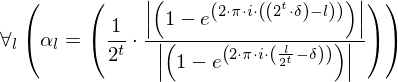

In [9]:
alpha_l_summed = Forall(l, Equals(alpha_l, Multiply(Fraction(one, two_pow_t), 
                                                    Fraction(alpha_l_summed_numer, alpha_l_summed_denom))))
alpha_l_summed

$| \alpha_l |^2$ inequality to bound the failure probability:

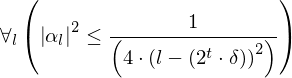

In [12]:
alpha_l_sqrd_ineq = Forall(l, LessThanEquals(alpha_l_sqrd, 
                                             Fraction(one, 
                                                      Multiply(four, 
                                                               Exponentiate(Subtract(l, 
                                                                                     Multiply(two_pow_t, 
                                                                                              delta_)), 
                                                                            two)))))
alpha_l_sqrd_ineq

A bound on the failure probability:

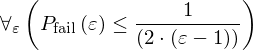

In [13]:
fail_ineq = Forall(eps, LessThanEquals(Pfail(eps), Fraction(one, Multiply(two, Subtract(eps, one)))))
fail_ineq

In [14]:
%end_theorems

Creating theorems *.dill and *.pv_it files in the __pv_it__ directory
success_sum has changed.  Replace it? (yes/no/all)a
These theorems may be imported from proveit.physics.quantum.QPE.theorems
